# **순환 신경망**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [2]:
(x_train_all, y_train_all) , (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)
#매개변수 skip_top: 가장 많이 등장한 단어(ex: a, is, the...등 분석에 유용하지 않은 것들) 중 건너뛸 단어의 개수
#매개변수 num_words: 훈련에 사용할 단어의 개수

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [4]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [5]:
#0,1,2 제외
for i in range(len(x_train_all)) :
  x_train_all[i] = [ w for w in x_train_all[i] if w>2 ]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [6]:
#어휘사전 내려받기(정수->영단어) / get_word_index(): { '영단어':정수 } 딕셔너리 반환
word_to_index = imdb.get_word_index()
print(word_to_index['movie'])

index_to_word = {word_to_index[k]: k for k in word_to_index}
print(index_to_word[17])

for w in x_train_all[0] :
  print(index_to_word[w-3], end=' ')

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
17
movie
film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
#1:긍정, 0:부정
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [8]:
np.random.seed(42)
random_index = np.random.permutation(25000) #25000 이하의 순서 랜덤

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [9]:
#각 리뷰의 길이 - 차이가 있음
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [10]:
#길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

print(x_train_seq.shape, x_val_seq.shape)
print(x_train_seq[0])

(20000, 100) (5000, 100)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [11]:
#원-핫 인코딩하기
from tensorflow.keras.utils import to_categorical
x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

print(x_train_onehot.shape)

(20000, 100, 100)


In [19]:
#순환 신경망 클래스 구현하기
class RecurrentNetwork :

  def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1) :
    self.n_cells = n_cells #셀 개수(순환층 뉴런 개수)
    self.batch_size = batch_size
    self.w1h = None #은닉상태에 대한 가중치
    self.w1x = None #입력에 대한 가중치
    self.b1 = None #순환층의 절편
    self.w2 = None #출력층의 가중치
    self.b2 = None #출력층의 절편
    self.h = None #순환층의 활성화 출력 저장
    self.losses = []
    self.val_losses = []
    self.lr = learning_rate


  def forpass(self, x) :
    self.h = [ np.zeros((x.shape[0], self.n_cells)) ] #은닉상태 초기화
    seq = np.swapaxes(x, 0, 1) #샘플개수 - 타임스텝 차원 바꿈
    for x in seq : #모든 단어(원핫코딩)에 대하여
      z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1 #순환층 선형 계산(X*Wx + H*Wh + b1)
      h = np.tanh(z1) #순환층 활성화 출력
      self.h.append(h) #활성화 출력값, 즉 전 타임스텝 은닉상태값 저장
      z2 = np.dot(h, self.w2) + self.b2 #출력층 선형 계산
    return z2


  def backprop(self, x, err) :
    m = len(x)

    w2_grad = np.dot(self.h[-1].T, err) / m #출력층 가중치 그레이디언트
    b2_grad = np.sum(err) / m #출력층 절편 그레이디언트

    seq = np.swapaxes(x, 0, 1) #샘플개수-타임스텝 차원 바꿈

    w1h_grad = w1x_grad = b1_grad = 0 #순환층 가중치들 초기화
    err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2) #순환층 전까지 미분값(그레이디언트값)
    for x, h in zip( seq[::-1][:10], self.h[:-1][::-1][:10] ) : #최근 타임스텝부터(뒤집기), 10개 타임스텝만 / 직전 은닉상태는 err_to_cell에 썼으므로 1개뺴고
      w1h_grad += np.dot(h.T, err_to_cell) #은닉상태 가중치 추가
      w1x_grad += np.dot(x.T, err_to_cell) #입력 가중치 추가
      b1_grad += np.sum(err_to_cell, axis=0) #순환층 절편 추가
      err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2) #이전 타임스텝의 순환층_전_그레이디언트값 계산

    w1h_grad /= m
    w1x_grad /= m
    b1_grad /= m

    return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad


  def sigmoid(self, z) :
    a = 1 / (1 + np.exp(-z))
    return a


  def init_weights(self, n_features, n_classes) :
    orth_init = tf.initializers.Orthogonal() #순환 신경망에서 쓸 직교 행렬 초기화
    glorot_init = tf.initializers.GlorotUniform() #출력층에서 쓸 글로럿 초기화

    self.w1h = orth_init( (self.n_cells, self.n_cells) ).numpy() #은닉상태 가중치 - (셀 개수, 셀 개수)
    self.w1x = glorot_init( (n_features, self.n_cells) ).numpy() #입력 가중치 - (특성개수, 셀 개수)
    self.b1 = np.zeros( self.n_cells ) #순환층 절편 - 셀 개수
    self.w2 = glorot_init( (self.n_cells, n_classes) ).numpy() #출력층 가중치 - (셀 개수, 클래스 개수)
    self.b2 = np.zeros( n_classes ) #출력층 절편 - 클래스 개수


  def fit(self, x, y, epochs=100, x_val=None, y_val=None) :
    y = y.reshape(-1,1)
    y_val = y_val.reshape(-1,1)
    np.random.seed(42)
    self.init_weights(x.shape[2], y.shape[1]) #가중치 초기화
    for i in range(epochs) :
      print('에포크', i, end=' ')
      batch_losses = []
      for x_batch, y_batch in self.gen_batch(x,y) :
        print('.', end='')
        a = self.training(x_batch, y_batch)
        a = np.clip(a, 1e-10, 1-1e-10)
        loss = np.mean( -(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)) )
        batch_losses.append(loss)
      print()
      self.losses.append(np.mean(batch_losses))
      self.update_val_loss(x_val, y_val)


  def gen_batch(self, x, y) :
    length = len(x)
    bins = length // self.batch_size
    if length % self.batch_size :
      bins += 1
    indexes = np.random.permutation( np.arange(len(x)) )
    x =x[indexes]
    y = y[indexes]
    for i in range(bins) :
      start = self.batch_size * i
      end = self.batch_size * (i+1)
      yield x[start:end], y[start:end]


  def training(self, x, y) :
    m = len(x)
    z = self.forpass(x) #순환층 ~ 출력층의 선형 계산까지
    a = self.sigmoid(z) #이중 분류 -> 활성화함수는 시그모이드로
    err = -(y - a) #오차
    w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err) #오차역전파 -> 각 그레이디언트 계산
    self.w1h -= self.lr * w1h_grad #학습률 적용하여 셀의 가중치 업데이트
    self.w1x -= self.lr * w1x_grad
    self.b1 -= self.lr * b1_grad
    self.w2 -= self.lr * w2_grad #학습률 적용하여 출력층 가중치 업데이트
    self.b2 -= self.lr * b2_grad
    return a


  def predict(self, x) :
    z = self.forpass(x)
    return z > 0


  def score(self, x, y) :
    return np.mean(self.predict(x) == y.reshape(-1,1))


  def update_val_loss(self, x_val, y_val) :
    z = self.forpass(x_val)
    a = self.sigmoid(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    val_loss = np.mean( -(y_val*np.log(a) + (1-y_val)*np.log(1-a)) )
    self.val_losses.append(val_loss)

In [20]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

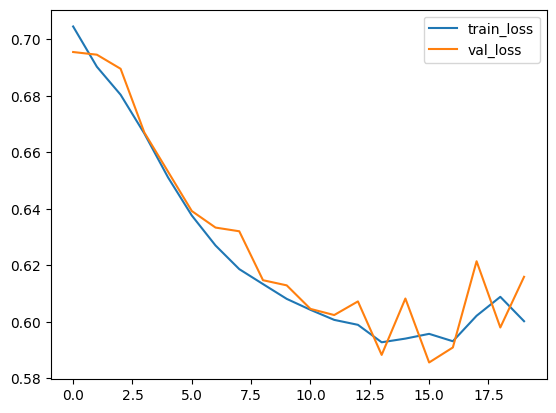

In [23]:
import matplotlib.pyplot as plt

plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [21]:
rn.score(x_val_onehot, y_val)

np.float64(0.6598)

# **텐서플로를 이용해 순환신경망 만들기**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [27]:
model = Sequential() #신경망 모델 생성

model.add( SimpleRNN(32, input_shape=(100,100)) ) #순환층 ( 셀 32개, (타임스텝,원핫인코딩)만큼의 입력 차원 )
model.add( Dense(1, activation='sigmoid') ) #출력층 (이진 분류)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         4,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit( x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.5027 - loss: 0.7058 - val_accuracy: 0.5182 - val_loss: 0.6940
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5215 - loss: 0.6921 - val_accuracy: 0.5488 - val_loss: 0.6880
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.5513 - loss: 0.6848 - val_accuracy: 0.5866 - val_loss: 0.6700
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5990 - loss: 0.6632 - val_accuracy: 0.6394 - val_loss: 0.6400
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.6372 - loss: 0.6407 - val_accuracy: 0.6650 - val_loss: 0.6167
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6504 - loss: 0.6244 - val_accuracy: 0.6380 - val_loss: 0.6448
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6716 - loss: 0.6113 - val_accuracy: 0.6768 - val_loss: 0.5982
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6787 - loss: 0.5985 - 

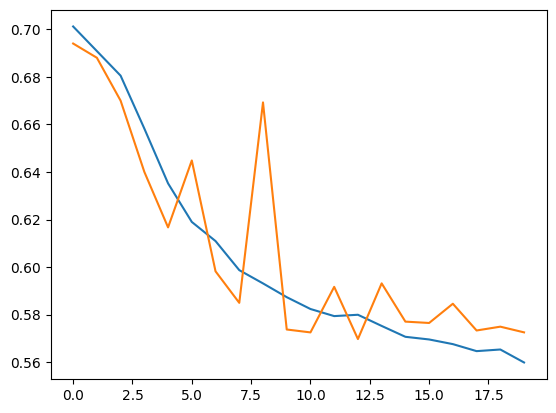

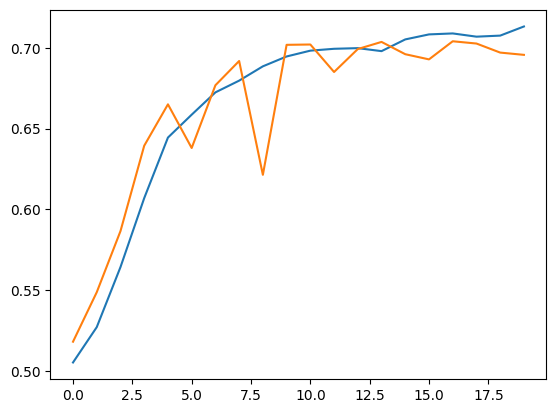

In [29]:
#손실그래프, 정확도 그래프 보기

#손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

#정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [33]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)

print(accuracy)

0.6955999732017517


In [34]:
#단어 임베딩(원-핫 인코딩의 단점 보완)

from tensorflow.keras.layers import Embedding

In [35]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)
#IMDB데이터 전처리 : 가장 많이 나오는 단어 20개 스킵(제외), 단어 1000개

for i in range(len(x_train_all)) :
  x_train_all[i] = [ w for w in x_train_all[i] if w>2 ] #0, 1, 2 제외

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [37]:
#타임스텝의 크기가 100인 시퀀스데이터 만들기 (행의 최대길이 100)
maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [39]:
#모델 만들기

model_ebd = Sequential()

model_ebd.add( Embedding(1000, 32) ) #(1000개 단어, 32개의 실수벡터값)으로 데이터 임베딩
model_ebd.add( SimpleRNN(8) ) #셀 개수가 8개인 순환층 추가
model_ebd.add( Dense(1, activation='sigmoid') ) #이진분류 출력층 추가

model_ebd.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.7273 - loss: 0.5400 - val_accuracy: 0.8256 - val_loss: 0.4146
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8434 - loss: 0.3714 - val_accuracy: 0.8190 - val_loss: 0.4337
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.8550 - loss: 0.3517 - val_accuracy: 0.8230 - val_loss: 0.3982
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8666 - loss: 0.3303 - val_accuracy: 0.8272 - val_loss: 0.4050
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8782 - loss: 0.3067 - val_accuracy: 0.8262 - val_loss: 0.3953
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8682 - loss: 0.3183 - val_accuracy: 0.8240 - val_loss: 0.4120
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8951 - loss: 0.2749 - val_accuracy: 0.8196 - val_loss: 0.4185
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9067 - loss: 0.2508 - 

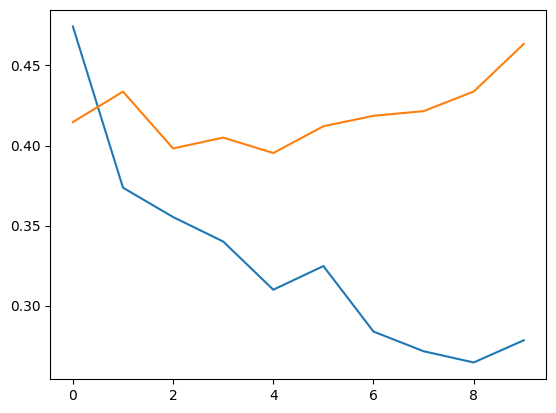

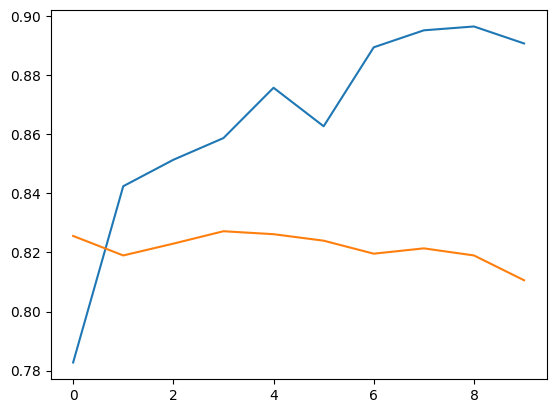

In [41]:
#손실그래프, 정확도 그래프 보기

#손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

#정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [42]:
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8105999827384949


In [43]:
#LSTM 순환 신경망
from tensorflow.keras.layers import LSTM

In [44]:
model_lstm = Sequential()

model_lstm.add( Embedding(1000, 32) ) #임베딩층
model_lstm.add( LSTM(8) ) #LSTM 순환층
model_lstm.add( Dense(1, activation='sigmoid') ) #출력층

model_lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.7178 - loss: 0.5520 - val_accuracy: 0.8354 - val_loss: 0.3855
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 37ms/step - accuracy: 0.8526 - loss: 0.3531 - val_accuracy: 0.8420 - val_loss: 0.3706
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8709 - loss: 0.3113 - val_accuracy: 0.8416 - val_loss: 0.3709
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.8800 - loss: 0.2902 - val_accuracy: 0.8398 - val_loss: 0.3793
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.8873 - loss: 0.2729 - val_accuracy: 0.8368 - val_loss: 0.3776
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 38ms/step - accuracy: 0.8967 - loss: 0.2563 - val_accuracy: 0.8346 - val_loss: 0.3828
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8962 - loss: 0.2510 - val_accuracy: 0.8334 - val_loss: 0.4036
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9058 - loss: 0.2402 - 

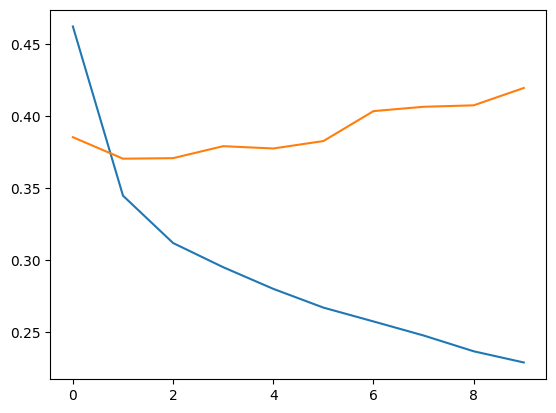

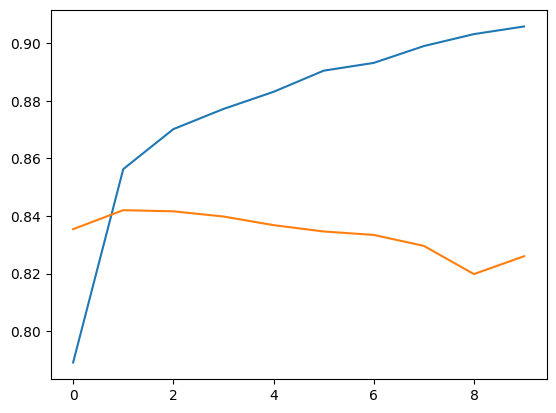

In [47]:
#손실그래프, 정확도 그래프 보기

#손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

#정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [48]:
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8259999752044678
